# Imports

In [8]:
import datetime as dt
import os
import pandas as pd
import numpy as np

from tqdm import tqdm

# Plotly : 인터랙티브 그래프를 그려주는 패키지
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

# Load Dataset

In [9]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/27_남양주영업소_드론영상분석/서울방향/01_density_by_target_LOS_concated_lanechange'

In [10]:
save_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/35_22-9차 회의 준비/11_남양주TG_구간별 차로변경횟수 및 교통량/구간별 차로변경횟수/서울방향'

In [11]:
file_list = os.listdir(data_dir)

In [12]:
file_list = file_list[0:6]

In [13]:
file_list

['01_1_A.csv',
 '01_2_A.csv',
 '01_3_A.csv',
 '02_1_A.csv',
 '02_2_A.csv',
 '02_3_A.csv']

# Filtering & Draw Trj
* 참고 URL : Plotly.express에 배경이미지 첨가

In [15]:
#웹에 업로드한 이미지 주소 리스트 : imgur, regenesis90@gmail.com
img_sources = {
    '01' : 'https://i.imgur.com/tEA0U25.jpg', #01
    '02' : 'https://i.imgur.com/WOhlomC.jpg' #02
    #'01' : 'https://i.imgur.com/yTIbF9Q.png', #01 inverse
    #'02' : 'https://i.imgur.com/VPMOHPh.png' #02 inverse
}

01_1_A.csv : ['U2' 'U1' 'U5' 'U4' 'U3']
01_2_A.csv : ['U2' 'U1' 'U4' 'U3']
01_3_A.csv : ['UNKNOWN' 'U3' 'U1' 'U2' 'U4']
02_1_A.csv : ['U2' 'U1' 'UNKNOWN' 'U6' 'U5']
02_2_A.csv : ['UNKNOWN' 'U4' 'U5' 'U6']
02_3_A.csv : ['UNKNOWN' 'U1' 'U3' 'U2' 'U4' 'U6']


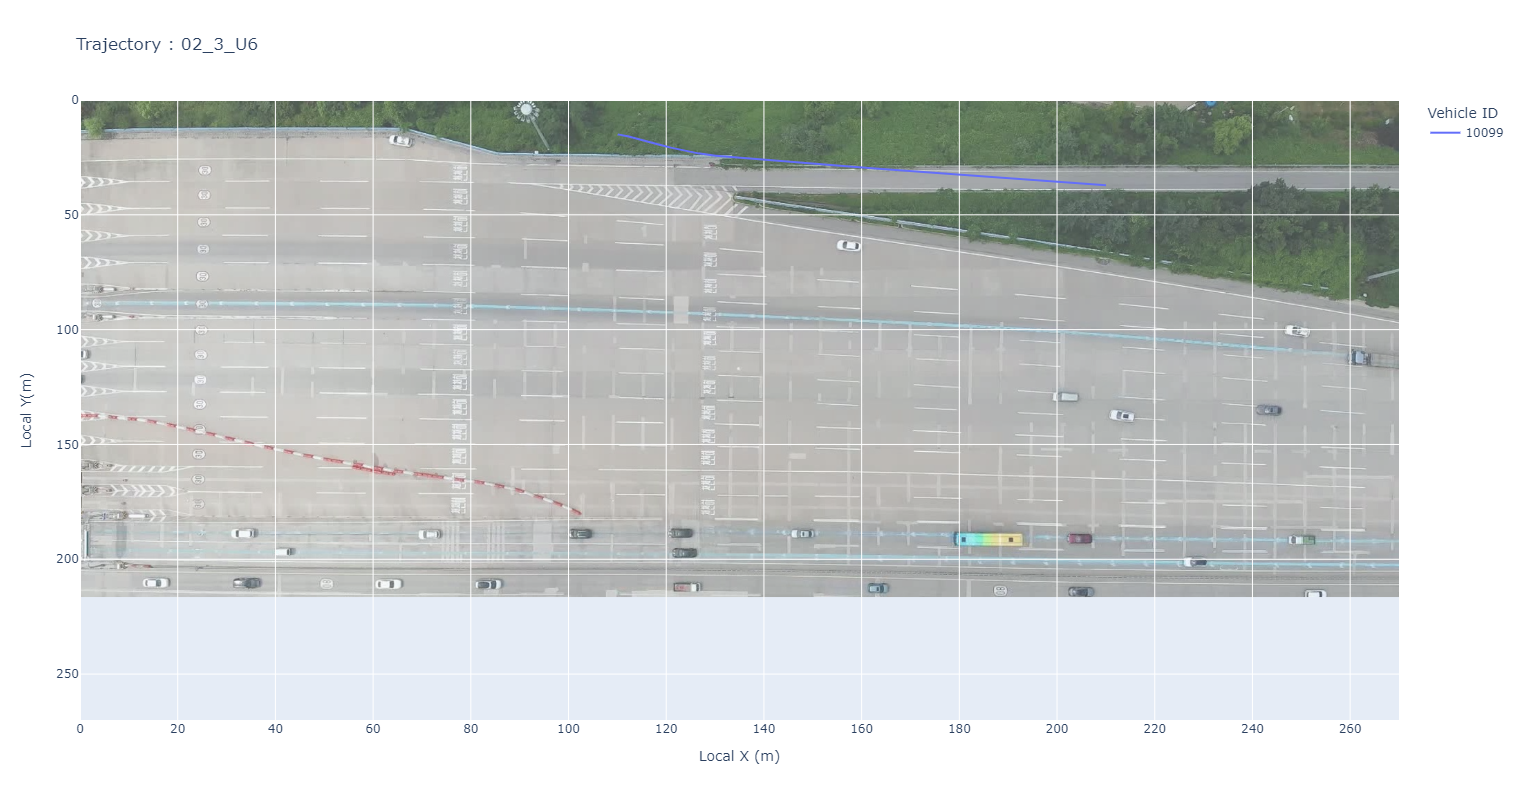

In [17]:
for file in file_list:
    file_path = os.path.join(data_dir, file) # 파일리스트의 파일별 경로 설정
    
    place_name = file[0:2]
    
    img = img_sources[place_name]
    
    df = pd.read_csv(file_path)
    
    booth_list = df['Lane_99'].unique()
    print(f'{file} : {booth_list}')
    
    for booth in booth_list: # 영업소 각 종착 부스별로
        df_booth = df[df['Lane_99'] == booth] # 각 부스별로 들어가는 차량들을 필터링하기
        
        df_booth
        
        fig = px.line(df_booth, x = 'Local X (m)', y = 'Local Y(m)', 
                      color = 'Vehicle ID',
                      title = f'Trajectory : {file[-10:-6]}_{booth}',
                      #template = 'simple_white',
                      width = 800,
                      height = 800)
        
        fig.update_xaxes(range = [0, 270], dtick = 20)
        fig.update_yaxes(range = [270, 0])
        
        #fig.update_layout({
        #    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
        #    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
        #})
        
        fig.add_layout_image(
            dict(
                #row = 1,
                #col = 1,
                source = img,
                xref = 'x domain',
                yref = 'y domain',
                x = 1,
                y = 1,
                xanchor = 'right',
                yanchor = 'top',
                sizex = 1,
                sizey = 1,
                #sizing = "stretch",
                opacity = 0.7,
                layer = "below"))
        
        #fig.update_traces(line_color = 'yellow', opacity = 0.5)
    
        save_html_name = f'{file[-10:-6]}_{booth}.html'
        save_html_path = os.path.join(save_dir, save_html_name)
    
        po.write_html(fig, file = save_html_path) # html Plotly 파일 저장
        
        save_png_name = f'{file[-10:-6]}_{booth}.png'
        save_png_path = os.path.join(save_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
    else:
        pass
    
fig.show()